In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
X = pd.read_csv("C:/_Dissertation/_Data/x.csv", index_col=0)
y = pd.read_csv("C:/_Dissertation/_Data/y.csv", index_col=0)
w = pd.read_csv("C:/_Dissertation/_Data/w.csv", index_col=0)
w = w[(w['x']=='no program') | (w['x']=='job search')]
X = X.loc[w.index]
y = y.loc[w.index]
p = pd.read_csv("C:/_Dissertation/Datasets/prop_score.csv", index_col=0)

In [4]:
w.index = range(len(w))
X.index = range(len(X))
y.index = range(len(y))

In [5]:
treated_index = w[w['x']=='job search'].index

In [6]:
w = w.drop(treated_index)
X = X.drop(treated_index)
y = y.drop(treated_index)
p = p.drop(treated_index)

In [7]:
y = y.values.reshape(y.shape[0],)

In [8]:
X

,age,canton_moth_tongue,city_big,city_medium,city_no,cw_age,cw_cooperative,cw_educ_above_voc,cw_educ_tertiary,cw_female,...,qual_wo_degree,swiss,ue_cw_allocation1,ue_cw_allocation2,ue_cw_allocation3,ue_cw_allocation4,ue_cw_allocation5,ue_cw_allocation6,ue_spells_last_2yrs,unemp_rate
0,27,1,0,0,1,57,1,0,1,0,...,0,0,1,1,0,0,0,0,0,3.2
1,43,0,0,0,1,33,1,0,1,1,...,0,1,1,0,0,0,0,0,0,3.1
4,41,0,0,0,1,57,0,1,0,0,...,0,0,1,0,0,0,0,0,2,4.5
5,39,0,1,0,0,40,0,1,0,1,...,1,1,0,0,0,0,0,0,1,4.4
7,46,0,0,0,1,57,1,0,1,0,...,0,0,1,1,0,0,0,0,0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59287,39,0,0,0,1,47,0,0,1,0,...,0,1,1,0,0,0,0,0,0,3.5
59288,42,0,1,0,0,41,1,1,0,1,...,0,1,1,0,0,0,0,0,0,3.2
59289,45,0,0,0,1,56,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3.2
59290,53,0,1,0,0,53,1,0,0,0,...,0,1,0,1,0,0,0,0,0,3.2


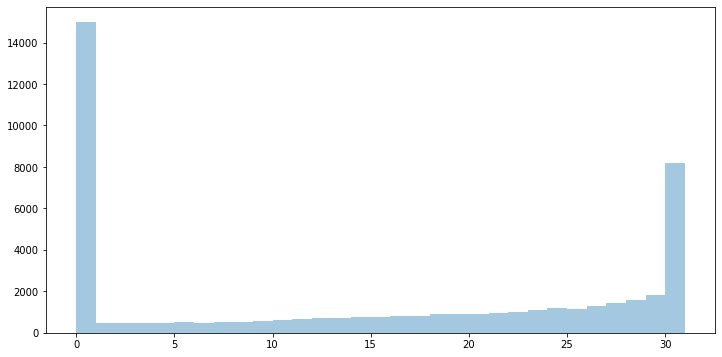

In [9]:
sns.distplot(y, bins=list(range(32)), kde=False)

In [10]:
X.columns

Index(['age', 'canton_moth_tongue', 'city_big', 'city_medium', 'city_no',
       'cw_age', 'cw_cooperative', 'cw_educ_above_voc', 'cw_educ_tertiary',
       'cw_female', 'cw_missing', 'cw_own_ue', 'cw_tenure', 'cw_voc_degree',
       'emp_share_last_2yrs', 'emp_spells_5yrs', 'employability', 'female',
       'foreigner_b', 'foreigner_c', 'gdp_pc', 'married',
       'other_mother_tongue', 'past_income', 'prev_job_manager',
       'prev_job_sec_mis', 'prev_job_sec1', 'prev_job_sec2', 'prev_job_sec3',
       'prev_job_self', 'prev_job_skilled', 'prev_job_unskilled',
       'qual_semiskilled', 'qual_degree', 'qual_unskilled', 'qual_wo_degree',
       'swiss', 'ue_cw_allocation1', 'ue_cw_allocation2', 'ue_cw_allocation3',
       'ue_cw_allocation4', 'ue_cw_allocation5', 'ue_cw_allocation6',
       'ue_spells_last_2yrs', 'unemp_rate'],
      dtype='object')

In [11]:
X.describe()

,age,canton_moth_tongue,city_big,city_medium,city_no,cw_age,cw_cooperative,cw_educ_above_voc,cw_educ_tertiary,cw_female,...,qual_wo_degree,swiss,ue_cw_allocation1,ue_cw_allocation2,ue_cw_allocation3,ue_cw_allocation4,ue_cw_allocation5,ue_cw_allocation6,ue_spells_last_2yrs,unemp_rate
count,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,...,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000,47684.000000
mean,36.609366,0.099929,0.194174,0.121571,0.684255,44.100138,0.480748,0.454681,0.195705,0.434779,...,0.031960,0.634657,0.599782,0.510549,0.038839,0.086780,0.126227,0.090617,0.569331,3.520918
std,8.665396,0.299908,0.395568,0.326793,0.464817,12.237322,0.499634,0.497947,0.396747,0.495733,...,0.175897,0.481531,0.489948,0.499894,0.193213,0.281515,0.332108,0.287067,1.219092,0.844252
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000
50%,36.000000,0.000000,0.000000,0.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000
75%,43.000000,0.000000,0.000000,0.000000,1.000000,54.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000
max,55.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.900000


In [12]:
X['employability']

0        2
1        3
4        2
5        2
7        2
        ..
59287    1
59288    1
59289    2
59290    1
59293    3
Name: employability, Length: 47684, dtype: int64

Heterogeneity variables based on earlier research:

female, past_income, age, city_big, employability

In [13]:
transformer = StandardScaler()
X_st = transformer.fit_transform(X)

In [14]:
X = pd.DataFrame(X_st, columns=X.columns)

In [15]:
X.describe()

,age,canton_moth_tongue,city_big,city_medium,city_no,cw_age,cw_cooperative,cw_educ_above_voc,cw_educ_tertiary,cw_female,...,qual_wo_degree,swiss,ue_cw_allocation1,ue_cw_allocation2,ue_cw_allocation3,ue_cw_allocation4,ue_cw_allocation5,ue_cw_allocation6,ue_spells_last_2yrs,unemp_rate
count,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,...,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04,4.768400e+04
mean,-1.926006e-15,-1.099355e-14,-2.787397e-15,-3.353787e-15,1.365424e-14,-7.230513e-18,-3.737049e-16,1.593586e-15,1.972623e-16,2.782310e-16,...,-3.596186e-15,-9.699508e-15,-3.969152e-15,-5.916578e-15,2.065364e-15,1.385492e-15,5.818603e-15,2.478419e-15,5.510599e-14,2.625411e-15
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.455155e+00,-3.332013e-01,-4.908797e-01,-3.720163e-01,-1.472111e+00,-3.603779e+00,-9.622100e-01,-9.131202e-01,-4.932798e-01,-8.770515e-01,...,-1.817019e-01,-1.318012e+00,-1.224189e+00,-1.021325e+00,-2.010185e-01,-3.082628e-01,-3.800813e-01,-3.156694e-01,-4.670175e-01,-3.222908e+00
25%,-8.781417e-01,-3.332013e-01,-4.908797e-01,-3.720163e-01,-1.472111e+00,-5.802097e-01,-9.622100e-01,-9.131202e-01,-4.932798e-01,-8.770515e-01,...,-1.817019e-01,-1.318012e+00,-1.224189e+00,-1.021325e+00,-2.010185e-01,-3.082628e-01,-3.800813e-01,-3.156694e-01,-4.670175e-01,-8.539223e-01
50%,-7.032249e-02,-3.332013e-01,-4.908797e-01,-3.720163e-01,6.792968e-01,-8.183119e-03,-9.622100e-01,-9.131202e-01,-4.932798e-01,-8.770515e-01,...,-1.817019e-01,7.587183e-01,8.168676e-01,9.791207e-01,-2.010185e-01,-3.082628e-01,-3.800813e-01,-3.156694e-01,-4.670175e-01,-3.801251e-01
75%,7.374968e-01,-3.332013e-01,-4.908797e-01,-3.720163e-01,6.792968e-01,8.089977e-01,1.039274e+00,1.095146e+00,-4.932798e-01,1.140184e+00,...,-1.817019e-01,7.587183e-01,8.168676e-01,9.791207e-01,-2.010185e-01,-3.082628e-01,-3.800813e-01,-3.156694e-01,-4.670175e-01,1.041267e+00
max,2.122330e+00,3.001189e+00,2.037159e+00,2.688054e+00,6.792968e-01,1.707897e+00,1.039274e+00,1.095146e+00,2.027247e+00,1.140184e+00,...,5.503518e+00,7.587183e-01,8.168676e-01,9.791207e-01,4.974666e+00,3.243985e+00,2.631016e+00,3.167871e+00,5.275020e+00,1.633513e+00


In [16]:
max_p = max(p.values)
om = np.sin(1.25*np.pi * p.values / max_p)
mean, std = om.mean(), om.std()
W = 3 * (om - mean) / std
W = W.reshape(W.shape[0],)

In [17]:
np.random.seed(13)
confounders = np.random.choice(X.columns, size=20, replace=False)
quad_confs = np.random.choice(confounders, size=5, replace=False)
lin_coefs = np.random.random(20)
quad_coefs = np.random.random(5) / 2
extra_tau = np.dot(X[confounders], lin_coefs) + np.dot(np.square(X[quad_confs]), quad_coefs)

['ue_cw_allocation6' 'ue_cw_allocation5' 'qual_degree' 'emp_spells_5yrs'
 'cw_cooperative' 'prev_job_self' 'past_income' 'ue_cw_allocation1'
 'ue_cw_allocation4' 'female' 'prev_job_unskilled' 'emp_share_last_2yrs'
 'city_medium' 'cw_educ_above_voc' 'cw_age' 'city_no' 'prev_job_skilled'
 'cw_tenure' 'cw_educ_tertiary' 'prev_job_manager']
['female' 'city_medium' 'qual_degree' 'cw_educ_tertiary'
 'emp_share_last_2yrs']
[0.60453883 0.77237876 0.0679175  0.68608508 0.5482601  0.13798605
 0.09875322 0.24555911 0.15178666 0.92599448 0.68010502 0.23765892
 0.56888525 0.55663205 0.07273721 0.83970851 0.40531949 0.14487099
 0.19092006 0.49064014]
[0.35601219 0.49246923 0.43739325 0.24952084 0.05339   ]


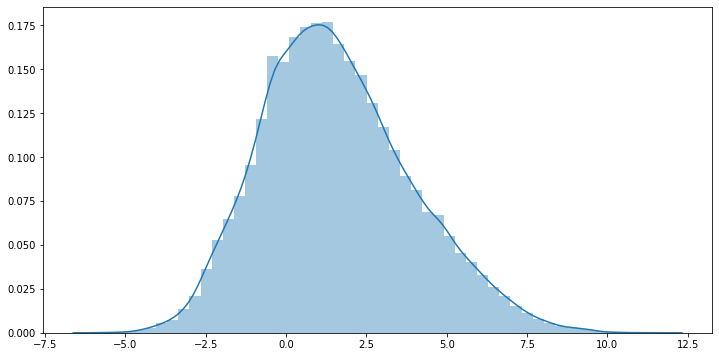

In [18]:
print(confounders)
print(quad_confs)
print(lin_coefs)
print(quad_coefs)
sns.distplot(extra_tau)

In [19]:
def make_tau(alpha, sigma, extra_confounding, heterogeneity, linear, random_state):
    if (not linear) and (heterogeneity!='none'):
        tau = alpha * (X['female'] + X['past_income'] + np.multiply(X['age'], X['city_big']) + np.int8(X['employability']>0.5) + 1)
        np.random.seed(random_state)
        tau = tau + np.random.normal(0, sigma**2, size=len(tau))
    if linear:
        tau = X['female'] + X['past_income'] + 2*X['age'] + 1
        np.random.seed(random_state)
        tau = tau + np.random.normal(0, 1, size=len(tau))
    if heterogeneity == 'none':
        tau = pd.Series([2 for _ in range(len(X))])
    if heterogeneity == 'high':
        tau = tau + extra_tau
    if extra_confounding:
        tau = tau + W
    return tau.values

In [20]:
def make_xi(tau):
    xi = np.empty(len(tau))
    uncensored = tau + y
    for i in range(len(uncensored)):
        x = uncensored[i]
        if x < 0:
            xi[i] = - y[i]
        elif x > 31:
            xi[i] = 31 - y[i]
        else:
            xi[i] = np.round(tau[i])
    return xi

In [21]:
p.mean()

0    0.173316
dtype: float64

The mean of the propensity score for non-treated individuals is only 3% lower than for the whole sample. So we do not adjust the propensity scores in step 7.2 of the EMCS. (Especially because the "computer", "vocational" and "language" groups are small.)

In [25]:
def simulate_treatment(p, few_treated, random_state):
    np.random.seed(random_state)
    if not few_treated:
        D_sim = np.random.binomial(1, p)
    if few_treated:
        p_sim = 0.02 * p / p.mean()
        D_sim = np.random.binomial(1, p_sim)
    return D_sim

In [23]:
for i in tqdm(range(10)):
    for j in range(8):
        if j==0:
            tau = make_tau(alpha=1, sigma=1, extra_confounding=False, heterogeneity='medium', linear=False, random_state=i)
        if j==1:
            tau = make_tau(alpha=0, sigma=1, extra_confounding=False, heterogeneity='medium', linear=False, random_state=i)
        if j==2:
            tau = make_tau(alpha=5, sigma=1, extra_confounding=False, heterogeneity='medium', linear=False, random_state=i)
        if j==3:
            tau = make_tau(alpha=1, sigma=5, extra_confounding=False, heterogeneity='medium', linear=False, random_state=i)
        if j==4:
            tau = make_tau(alpha=1, sigma=1, extra_confounding=True, heterogeneity='medium', linear=False, random_state=i)
        if j==5:
            tau = make_tau(alpha=1, sigma=1, extra_confounding=False, heterogeneity='high', linear=False, random_state=i)
        if j==6:
            tau = make_tau(alpha=1, sigma=1, extra_confounding=False, heterogeneity='none', linear=False, random_state=i)
        if j==7:
            tau = make_tau(alpha=1, sigma=1, extra_confounding=False, heterogeneity='medium', linear=True, random_state=i)
        xi = make_xi(tau)
        y1 = y + xi
        D = simulate_treatment(p=p, few_treated=False, random_state=i)
        D = D.reshape(D.shape[0],)
        y_sim = D * y1 + (1 - D) * y
        df = pd.DataFrame()
        df['y'] = y_sim
        df['D'] = D
        df['ite'] = xi
        df.to_csv("C:/_Dissertation/Datasets/knob_"+str(j)+"/dataset_"+str(i)+".csv")

In [24]:
X.to_csv('C:/_Dissertation/Datasets/X_nt_normalised.csv')

In [26]:
for i in tqdm(range(10)):
    tau = make_tau(alpha=1, sigma=1, extra_confounding=False, heterogeneity='medium', linear=False, random_state=i)
    xi = make_xi(tau)
    y1 = y + xi
    D = simulate_treatment(p=p, few_treated=True, random_state=i)
    D = D.reshape(D.shape[0],)
    y_sim = D * y1 + (1 - D) * y
    df = pd.DataFrame()
    df['y'] = y_sim
    df['D'] = D
    df['ite'] = xi
    df.to_csv("C:/_Dissertation/Datasets/knob_8/dataset_"+str(i)+".csv")

In [29]:
p.index = range(len(p))
p.to_csv('C:/_Dissertation/Datasets/prop_score_nt.csv')